# H&M Retail Sales Analysis
---

# Import Packages and Load data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
articles = pd.read_csv('articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
customers = pd.read_csv('customers.csv')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
transactions = pd.read_csv('transactions_train.csv')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
samples = transactions[0:10000].copy()
samples.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [10]:
samples.shape

(10000, 5)

In [34]:
samples['t_dat'] = samples['t_dat'].astype('datetime64[ns]')
begin = samples.groupby('article_id')['t_dat'].min()
end = samples.groupby('article_id')['t_dat'].max()
prod_life = pd.merge(begin, end, how='inner', on='article_id').reset_index()
prod_life.columns=['article_id','start_date','end_date']
prod_life['life']=prod_life['end_date']-prod_life['start_date']
prod_life.head()

,article_id,start_date,end_date
0,108775015,2018-09-20,2018-09-20
1,108775051,2018-09-20,2018-09-20
2,110065001,2018-09-20,2018-09-20
3,110065002,2018-09-20,2018-09-20
4,111586001,2018-09-20,2018-09-20


In [37]:
transactions['t_dat'] = transactions['t_dat'].astype('datetime64[ns]')
begin = transactions.groupby('article_id')['t_dat'].min()
end = transactions.groupby('article_id')['t_dat'].max()
prod_life = pd.merge(begin, end, how='inner', on='article_id').reset_index()
prod_life.columns=['article_id','start_date','end_date']
prod_life['life']=prod_life['end_date']-prod_life['start_date']
prod_life.head()

,article_id,start_date,end_date,life
0,108775015,2018-09-20,2020-07-22,671 days
1,108775044,2018-09-20,2020-09-20,731 days
2,108775051,2018-09-20,2019-06-28,281 days
3,110065001,2018-09-20,2020-08-02,682 days
4,110065002,2018-09-20,2020-08-05,685 days


In [38]:
prod_life.tail()

,article_id,start_date,end_date,life
104542,952267001,2020-08-29,2020-09-22,24 days
104543,952938001,2020-09-15,2020-09-22,7 days
104544,953450001,2020-09-07,2020-09-22,15 days
104545,953763001,2020-09-11,2020-09-22,11 days
104546,956217002,2020-09-09,2020-09-21,12 days


In [50]:
prod_life['life'] = prod_life['life'].astype(str).str.split(' ', expand=True)[0]

In [53]:
prod_life['life'] = prod_life['life'].astype(int)
prod_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104547 entries, 0 to 104546
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  104547 non-null  int64         
 1   start_date  104547 non-null  datetime64[ns]
 2   end_date    104547 non-null  datetime64[ns]
 3   life        104547 non-null  int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 3.2 MB


In [54]:
prod_life.describe()

,article_id,start_date,end_date,life
count,1.045470e+05,104547,104547,104547.000000
mean,6.968200e+08,2019-05-26 09:53:31.374787840,2020-01-22 10:24:01.074349312,241.021177
min,1.087750e+08,2018-09-20 00:00:00,2018-09-20 00:00:00,0.000000
25%,6.161290e+08,2018-10-02 00:00:00,2019-07-10 00:00:00,85.000000
50%,7.010500e+08,2019-03-24 00:00:00,2020-03-12 00:00:00,205.000000
75%,7.945750e+08,2019-12-17 00:00:00,2020-09-01 00:00:00,369.000000
max,9.562170e+08,2020-09-22 00:00:00,2020-09-22 00:00:00,733.000000
std,1.277177e+08,NaN,NaN,187.982782


(array([23475., 16909., 14603., 13664.,  9513.,  8954.,  7209.,  3559.,
         3049.,  3612.]),
 array([  0. ,  73.3, 146.6, 219.9, 293.2, 366.5, 439.8, 513.1, 586.4,
        659.7, 733. ]),
 <BarContainer object of 10 artists>)

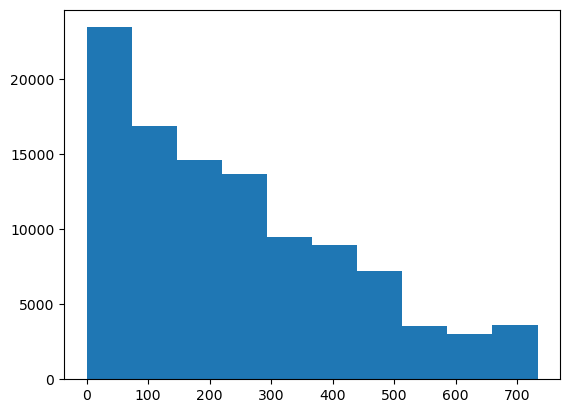

In [56]:
import seaborn as sns
plt.figure()
# sns.barplot()
plt.hist(prod_life['life'])

In [57]:
prod_life.shape

(104547, 4)

In [58]:
articles.shape

(105542, 25)

In [59]:
pl = prod_life.merge(articles, how='left', on='article_id')

<Axes: ylabel='index_name'>

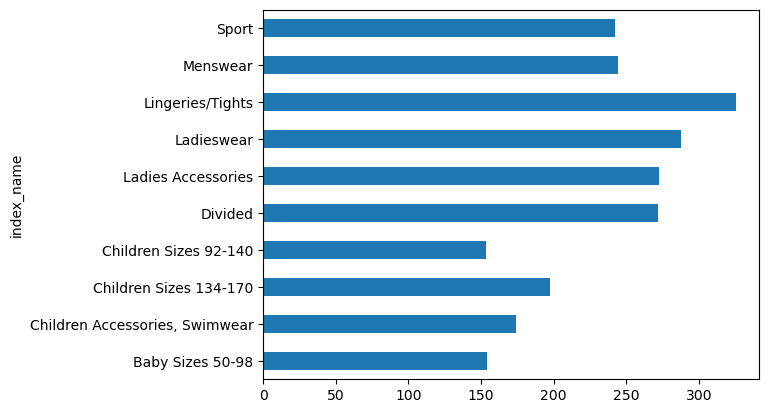

In [61]:
pl.groupby('index_name')['life'].mean().plot(kind='barh')